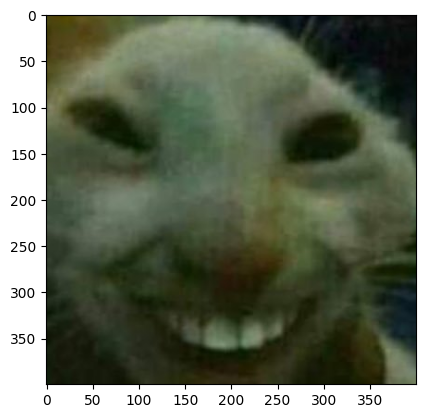

In [76]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

# Load the image
img = Image.open('kot.png')

# Display the image
plt.imshow(img)
plt.show()

In [85]:
# Convert the image data to a numpy array
img_data = np.array(img)

# Save the original size and number of channels
original_size = img_data.shape[:2]  # Size (height, width)
num_channels = img_data.shape[2] if len(img_data.shape) > 2 else 1  # Number of channels

print(f"Original size: {original_size}, Number of channels: {num_channels}")

# Reshape the array to 1-dimension and convert the image data to binary format
bit_table = np.unpackbits(img_data.reshape(-1))

print(bit_table)
print("Number of bits in the image: ",len(bit_table))

#calculate maximum message length
max_message_length = len(bit_table) // 8 // 8
print("Maximum signs in the message to ne encrypted: ",max_message_length)

#generate random message to be encrypted of maximum size
message = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for i in range(max_message_length-3))
#message = "ola bogdan"
#add ending character
message += "end"

#decide on which bits hide the message
bit = 0

#convert message to binary
message_bin = ''.join(format(ord(i), '08b') for i in message)
print("Message in binary: ",message_bin)

Original size: (400, 400), Number of channels: 3
[0 1 0 ... 1 1 1]
Number of bits in the image:  3840000
Maximum signs in the message to ne encrypted:  60000
Message in binary:  011010110110011101100001011001110111001101100110011000110110101101110001011010100111010001101010011000100111101001111001011101110111100001101010011110000111010001100011011101110110111001110001011011110110010101101110011001110111101001100110011011000110011101100101011100100111100001101101011011110111001001101111011011010111100101101110011110000110101101101000011011000110001001101001011000110110011001101010011000010110000101110101011010000111011101111010011110100111001001101010011101000110110001110110011110010110000101110010011000110110111101110000011110010110001101111001011001000111010101101111011101000111011101110010011011100111101001100011011100000111000001110101011001000111001001111000011100100110000101101101011010110111001001101001011001010110011101110001011101110110010101110111011110100111101001101010011000

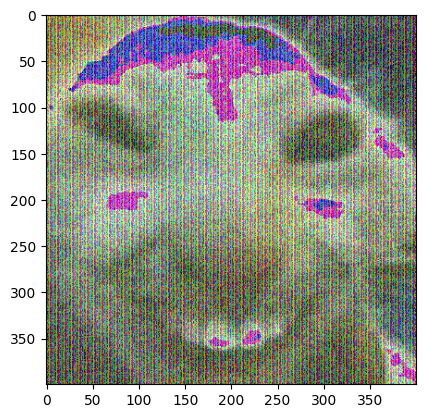

In [86]:
#put message in the image
for i in range(len(message_bin)):
    bit_table[i*8+bit] = message_bin[i]

#convert the image to the original format
new_img_data = np.packbits(bit_table)
new_img_data = new_img_data.reshape(original_size[0], original_size[1], num_channels)

#display the image
new_img = Image.fromarray(new_img_data)
plt.imshow(new_img)
plt.show()

In [87]:
#end string as bits table
end = ''.join(format(ord(i), '08b') for i in "end")

#decrypt the message
decrypted_message_bin = ''
new_bit_table = np.unpackbits(new_img_data.reshape(-1))
for i in range(len(new_bit_table)):
    decrypted_message_bin += str(new_bit_table[i*8+bit])
    if(decrypted_message_bin[-len(end):] == end):
        break

#convert binary message to string
decrypted_message = ''.join(chr(int(decrypted_message_bin[i:i+8], 2)) for i in range(0, len(decrypted_message_bin)-24, 8))
print("Decrypted message: ",decrypted_message)

Decrypted message:  kgagsfckqjtjbzywxjxtcwnqoengzflgerxmoromynxkhlbicfjaauhwzzrjtlvyarcopycyduotwrnzcppudrxramkriegqwewzzjbvxnicwuylgfnjertojssbmavzdooyahjvyrlmwozddeqnnsthqqeppmgzcncgxtxryfdsjqygcmmnyvbkoiyyxmilgnqjncegiqemzvywtoiozdwvmzhvsrfxhgpmxxmvctjcvvwhwazavnkjannhjfikgvmusehvhljrwpbytgixronizotznsiptgzhpgzbbpunnayjhascopalpiktdtmwsqtavbppiqfpfczkwduntrsajwtalqbjiodipaxitufmtnrhlnjwrkvunqnbnhvdlfnldmestqmclfstfigyjviaugldgmwhlouzxlhtvtvozlkhuowpvhyuyopztfgvemyonxgyebbfrnourxswgrgrluziycrqmwavewwhvhzqkyrsrpigbxgriaqovjiappapzoyaxcnslppfvhnwrkzuluzowvxivnfxxzqvhvefsddnqhjgclegxdkgyxtsoywnfriweqlgznzmwihasplrxdxuqrjksoeopxfkvbiwidzzuenjyqmrdmrizbmffzokcfdgliitpooitbxmobqxlcieksjnopvbgfexpmodnqymdwmfqkiacxfnnmywxsqiocnswrcixlhibwaijjnjoebuhsannolhhqyecrqzhlzahncvaeuxiqciddqpfvoexbewbeptszmzohvqyhxckjxjdxybmfrmtbpfdzqvnyojziycpzjojiibapltbawaxfwuxntmjzpdlednsbjjrobnqxqbtrlctuhtcjawavbodjlagexnmzvcbadjwcjcdoacmapsrzworuqsjfuukoxfgiwrlhwtlbrivyilufuzrdjlbruqygzjuajlsckoopqtndmsgbpwqcun